# Plane Source Examples

**Scott Prahl**

**Oct 2023**

We use Green's function solutions for heat transfer due to an xy-planar
source in an infinite medium, encapsulated within the `Plane` class. The solutions are
based on the mathematical formulations provided in Carslaw and Jaeger's work.

The `Plane` class represents a planar heat source located at a specified depth `zp` in
the medium. It provides methods to calculate the temperature rise at any given depth `z`
at a specified time `t` due to different types of heat source behavior.

Three types of plane source behaviors are supported:

- `instantaneous()`: Represents a single, instantaneous release of heat from zp-plane at time `tp`.

- `continuous()`: Represents a continuous release of heat from the zp-plane starting at t=0.

- `pulsed()`: Represents a pulsed release of heat from zp-plane from t=0 to `t_pulse`.

Each of these line sources can be analyzed under different boundary conditions at z=0:

- `'infinite'`: No boundary (infinite medium).

- `'adiabatic'`: No heat flow across the boundary.

- `'zero'`: Boundary is fixed at T=0.

In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Instantaneous 1 J/mm² planar sources

### No boundary condition at z=0 (infinite medium)

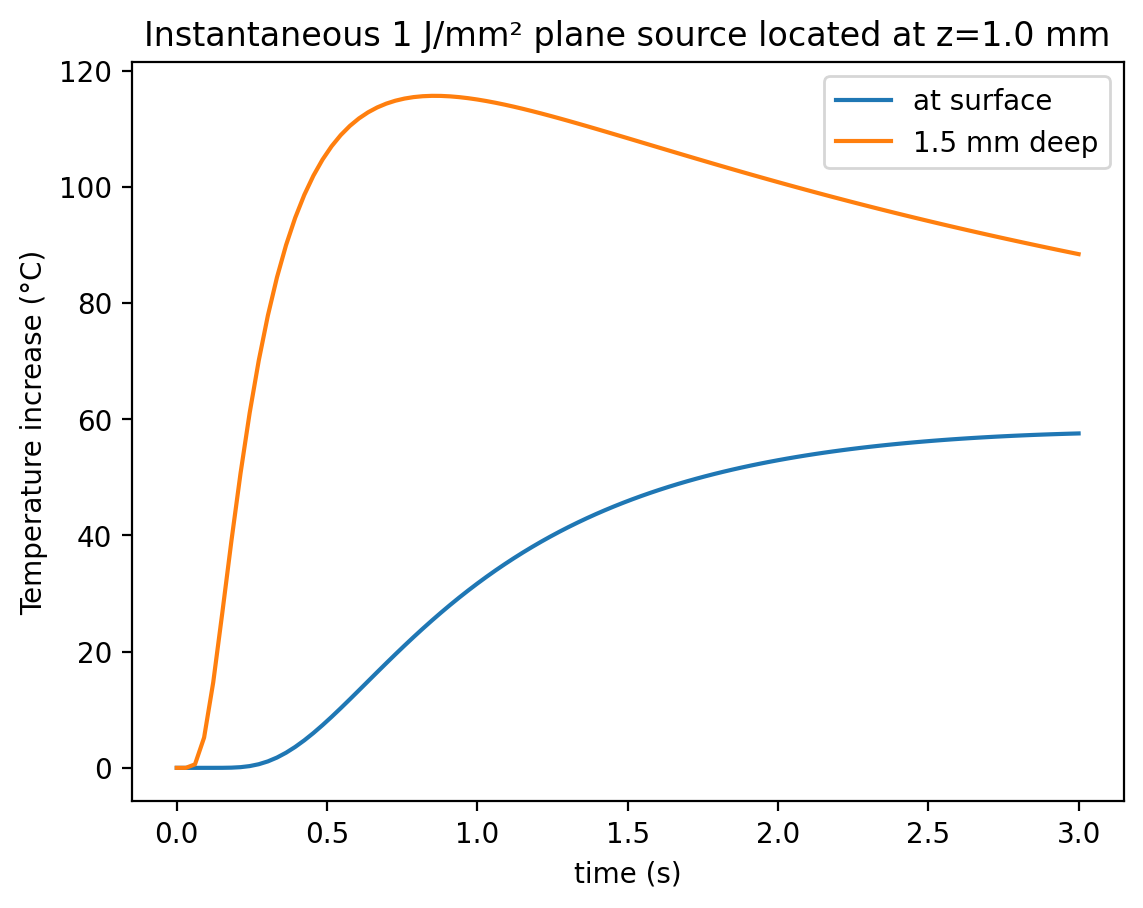

In [2]:
zp = 0.001               # meters
tp = 0                   # seconds impulse time
t = np.linspace(0,3,100) # seconds

plane = grheat.Plane(zp, tp)

z = 0
T = plane.instantaneous(z,t) * 1e6
plt.plot(t,T, label='at surface')

z = 0.0015
T = plane.instantaneous(z,t) * 1e6
plt.plot(t,T, label='%.1f mm deep' % (z*1000))

plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² plane source located at z=%.1f mm" % (zp*1000))
plt.show()

### Infinite medium

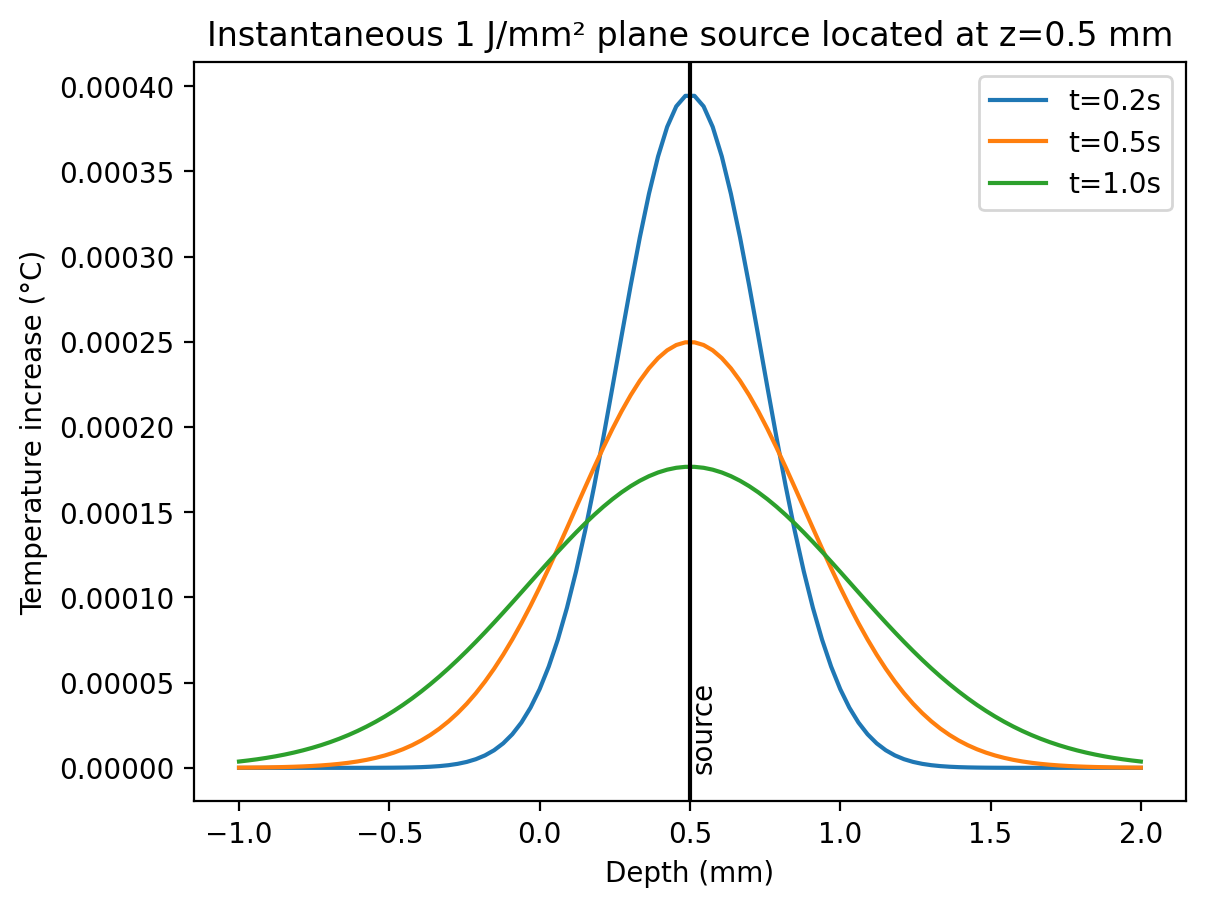

In [3]:
tp = 0                            # seconds impulse time
zp = 0.0005                       # meters
z = np.linspace(-0.001,0.002,100) # meters

plane = grheat.Plane(zp, tp)

for t in [0.2, 0.5, 1.0]:
    T = plane.instantaneous(z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)

plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² plane source located at z=%.1f mm" % (zp*1000))
plt.legend()
plt.show()

### Adiabatic boundary condition

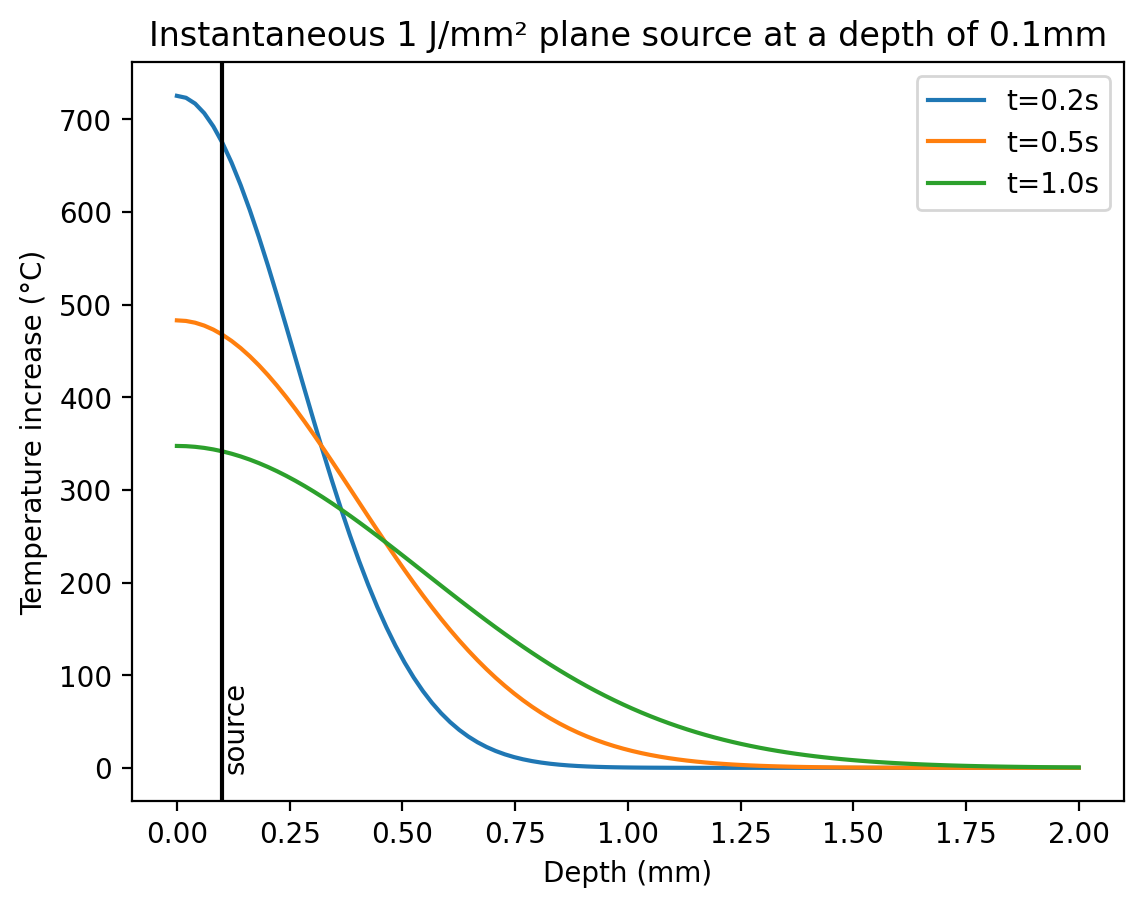

In [4]:
tp = 0                            # seconds impulse time
t = np.linspace(0,3,100)          # seconds
zp = 0.0001                       # meters
z = np.linspace(0,0.002,100)      # meters

plane = grheat.Plane(zp, tp, boundary='adiabatic')

for t in [0.2, 0.5, 1.0]:
    T = plane.instantaneous(z,t) * 1e6
    plt.plot(z*1000,T, label='t=%.1fs'%t)

plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² plane source at a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

### Zero boundary condition

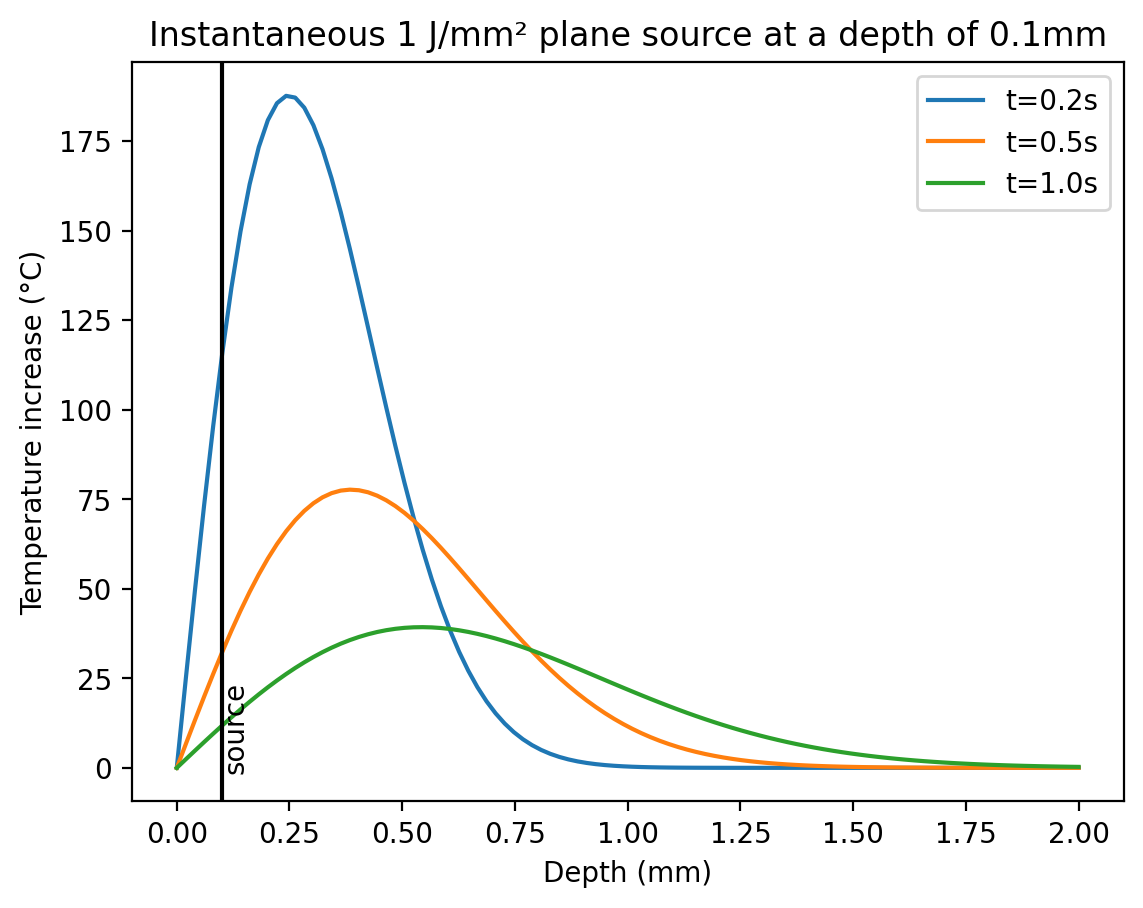

In [5]:
tp = 0                       # seconds impulse time
t = np.linspace(0,3,100)     # seconds
zp = 0.0001                  # meters
z = np.linspace(0,0.002,100) # meters

plane = grheat.Plane(zp, tp, boundary='zero')

for t in [0.2, 0.5, 1.0]:
    T = plane.instantaneous(z,t) * 1e6
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/mm² plane source at a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

## Pulsed 1 J/mm² planar sources

### No boundary condition at z=0 (infinite medium)

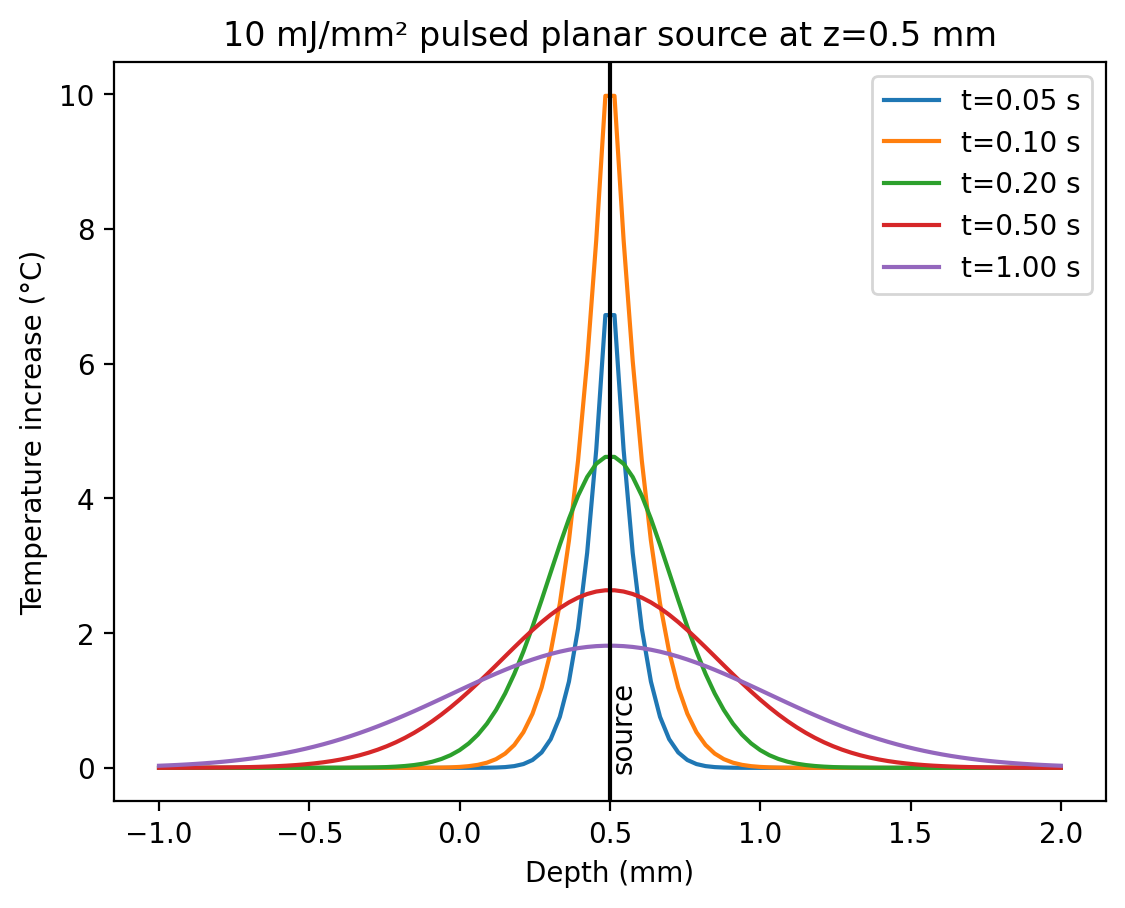

In [6]:
t_pulse = 0.1                     # seconds 
zp = 0.0005                       # meters
z = np.linspace(-0.001,0.002,100) # meters

plane = grheat.Plane(zp)

for t in [0.05, 0.1, 0.2, 0.5, 1.0]:
    T = plane.pulsed(z, t, t_pulse) * 1e4
    plt.plot(z*1000,T, label='t=%.2f s'%t)

plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("10 mJ/mm² pulsed planar source at z=%.1f mm" % (zp*1000))
plt.legend()
plt.show()

## Pulsed and continuous planar sources

### Adiabatic boundary condition at z=0

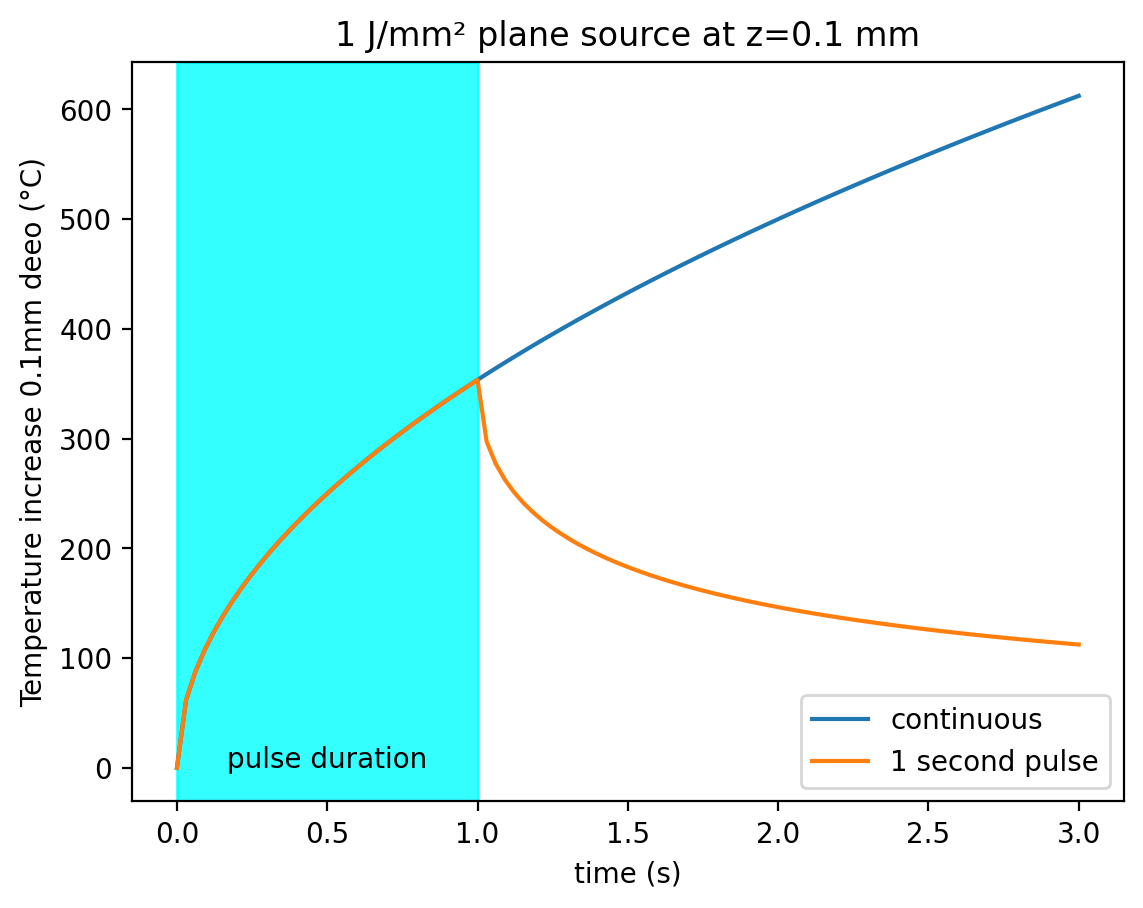

In [7]:
zp = 0.0001              # meters
t_pulse = 1              # seconds impulse time
t = np.linspace(0,3,100) # seconds

plane = grheat.Plane(zp)

z = 0.0001
T = plane.continuous(z, t) * 1e6
plt.plot(t,T, label='continuous')

T = plane.pulsed(z, t, t_pulse) * 1e6
plt.plot(t,T, label='1 second pulse')

plt.axvspan(0,t_pulse,color='cyan',alpha=0.8)
plt.text(t_pulse/2,0,"pulse duration",ha='center')

plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase 0.1mm deeo (°C)')
plt.title("1 J/mm² plane source at z=%.1f mm" % (zp*1000))
plt.show()